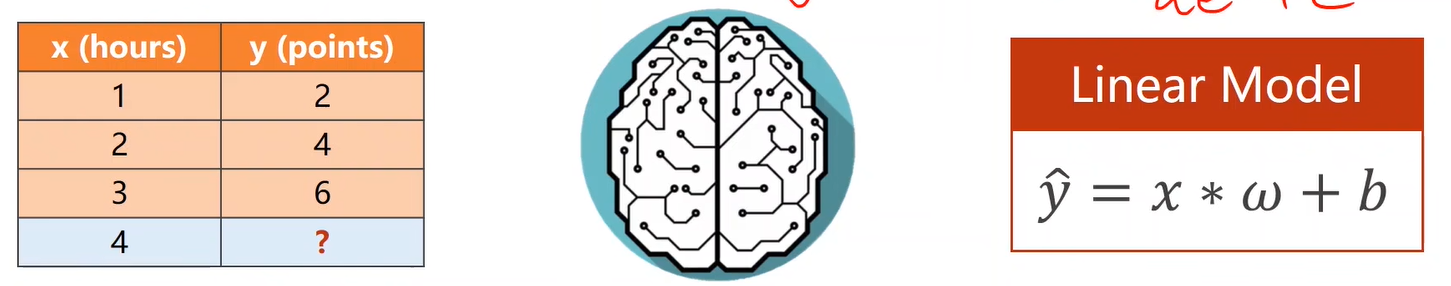

# 平均平方误差(MSE)Mean Square Error

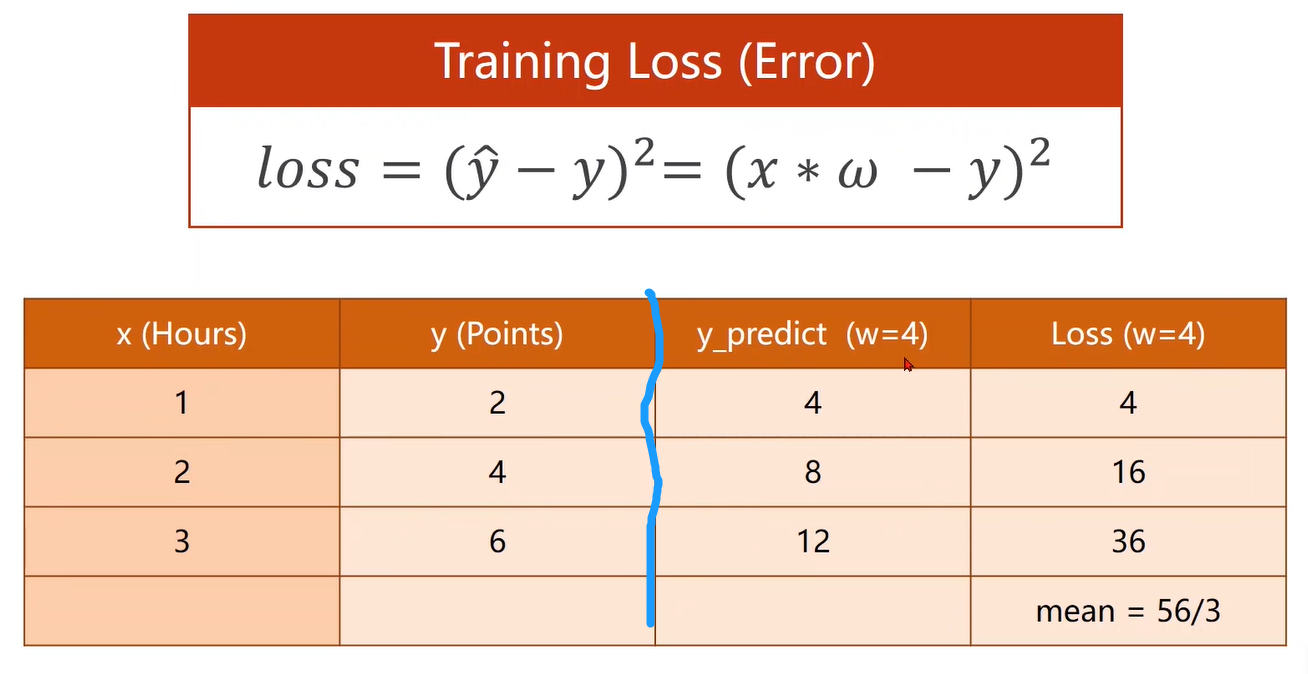

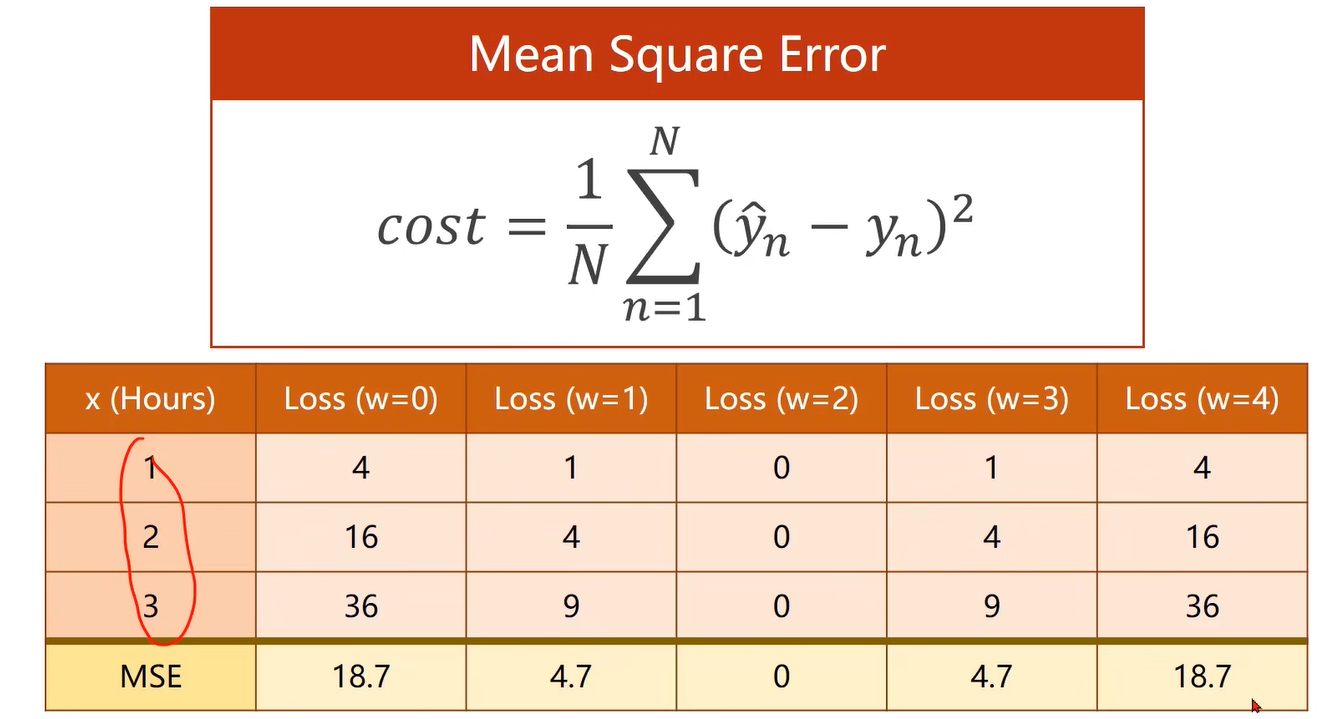

损失曲线

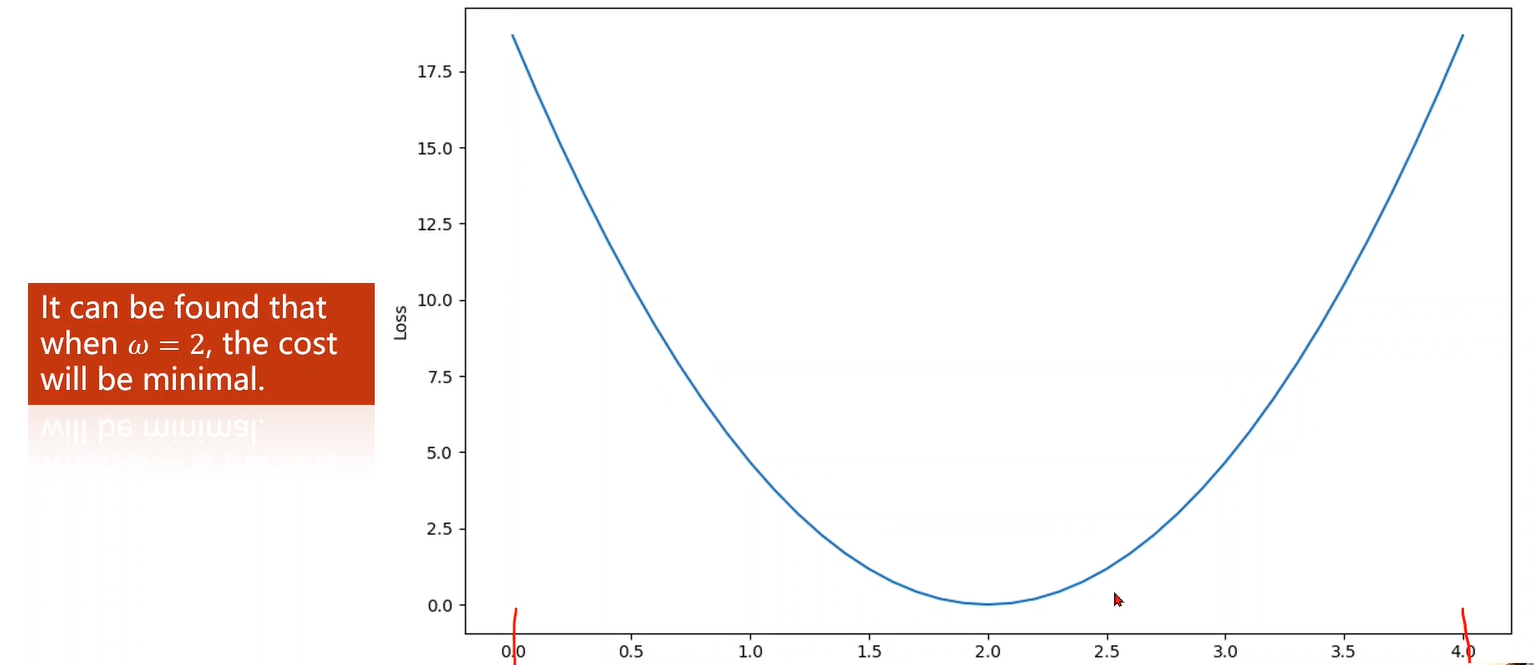

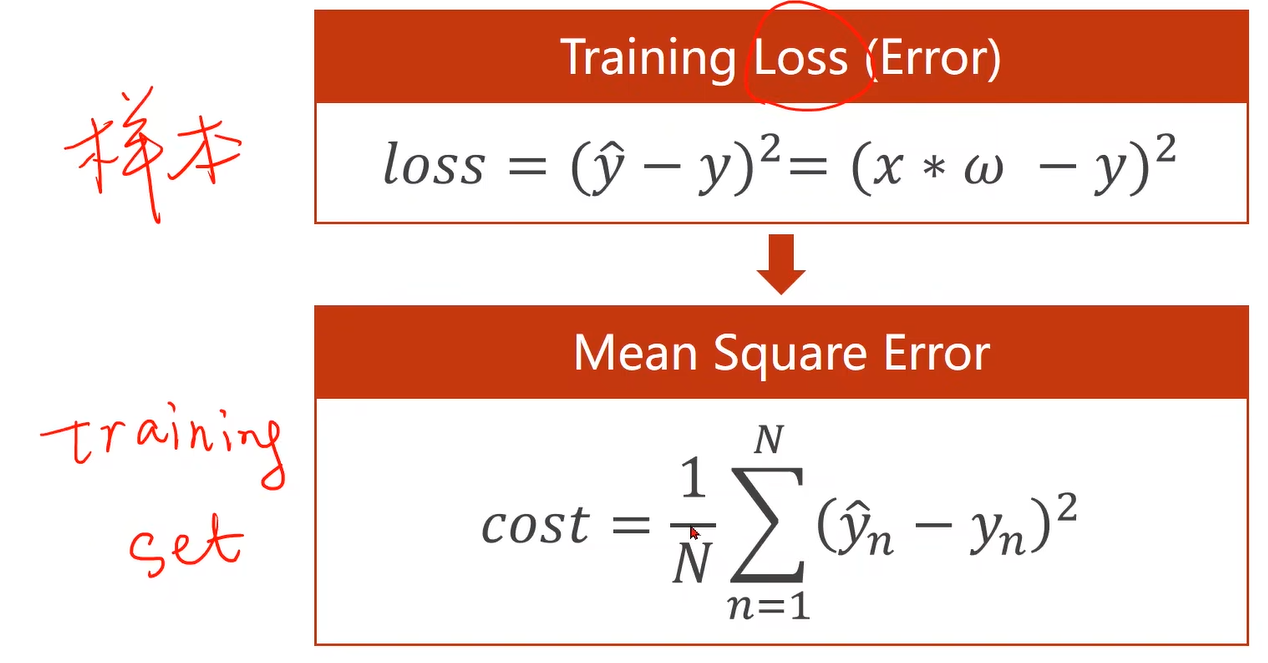

w= 0.0
        训练集x 训练集y y预测 损失loss
	 1.0    2.0    0.0    4.0
        训练集x 训练集y y预测 损失loss
	 2.0    4.0    0.0    16.0
        训练集x 训练集y y预测 损失loss
	 3.0    6.0    0.0    36.0
MSE= 18.66667
----------------------------------------------------------
w= 0.1
        训练集x 训练集y y预测 损失loss
	 1.0    2.0    0.1    3.61
        训练集x 训练集y y预测 损失loss
	 2.0    4.0    0.2    14.44
        训练集x 训练集y y预测 损失loss
	 3.0    6.0    0.3    32.49
MSE= 16.84667
----------------------------------------------------------
w= 0.2
        训练集x 训练集y y预测 损失loss
	 1.0    2.0    0.2    3.24
        训练集x 训练集y y预测 损失loss
	 2.0    4.0    0.4    12.96
        训练集x 训练集y y预测 损失loss
	 3.0    6.0    0.6    29.16
MSE= 15.12
----------------------------------------------------------
w= 0.30000000000000004
        训练集x 训练集y y预测 损失loss
	 1.0    2.0    0.3    2.89
        训练集x 训练集y y预测 损失loss
	 2.0    4.0    0.6    11.56
        训练集x 训练集y y预测 损失loss
	 3.0    6.0    0.9    26.01
MSE= 13.48667
-------------------------------------

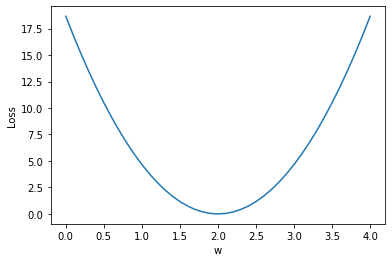

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#训练集
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

#定义模型
def forward(x):
    return x*w

#定义损失函数
def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2 # loss=(y^ - y )^2=(x*w - y)^2 

# 穷举法
w_list =[]        #空列表将来写入权重
mse_list = []     #空列表将来写入损失值

for w in np.arange(0.0, 4.1, 0.1, dtype=float): #arrange函数生成0.0 0.1 0.2 0.3....3.9 4.0
    print('w=',w)
    l_sum = 0
    for x_val,y_val in zip(x_data,y_data): #zip
        y_pred_val = forward(x_val)        #计算预测
        loss_val =loss(x_val,y_val)        #计算损失函数
        l_sum +=loss_val                   #损失求和(暂时未求平均)
        #方便看，保留四位小数
        y_pred_val=np.around(y_pred_val, 4)
        loss_val=np.around(loss_val, 4)
        print("        训练集x 训练集y y预测 损失loss")
        print('\t',x_val,'  ', y_val,'  ', y_pred_val,'  ', loss_val)
    MSE=np.around(l_sum/3, 5)            # 求平均，转变成MSE
    print('MSE=',MSE)                  
    w_list.append(w)
    mse_list.append(l_sum/3)
    print('----------------------------------------------------------')
 
plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()     

# 作业题目：实现线性模型（y=wx+b）并输出loss的3D图像。

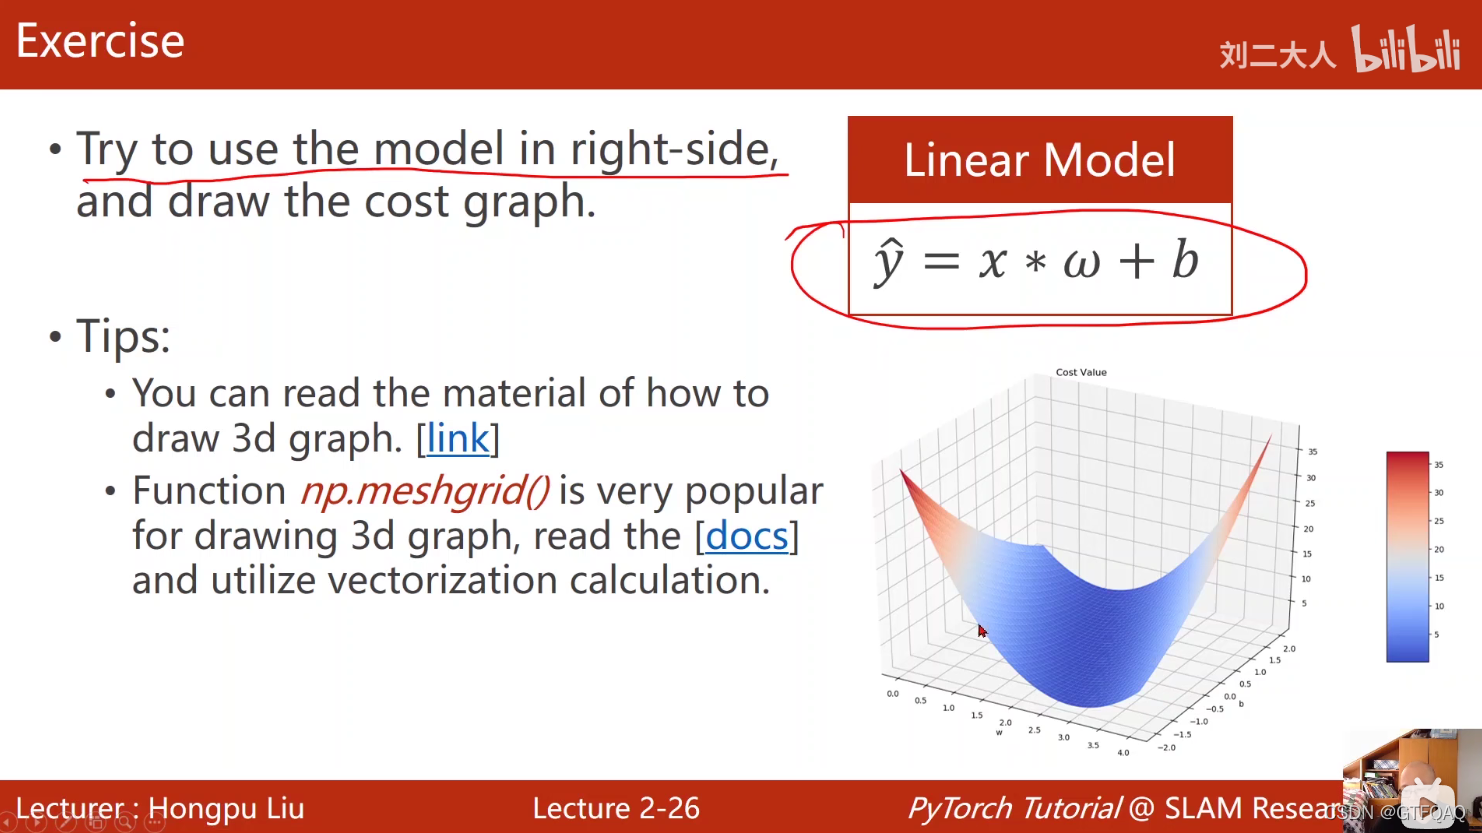

[array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       ...,
       [3.8, 3.8, 3.8, ..., 3.8, 3.8, 3.8],
       [3.9, 3.9, 3.9, ..., 3.9, 3.9, 3.9],
       [4. , 4. , 4. , ..., 4. , 4. , 4. ]]), array([[-2. , -1.9, -1.8, ...,  1.8,  1.9,  2. ],
       [-2. , -1.9, -1.8, ...,  1.8,  1.9,  2. ],
       [-2. , -1.9, -1.8, ...,  1.8,  1.9,  2. ],
       ...,
       [-2. , -1.9, -1.8, ...,  1.8,  1.9,  2. ],
       [-2. , -1.9, -1.8, ...,  1.8,  1.9,  2. ],
       [-2. , -1.9, -1.8, ...,  1.8,  1.9,  2. ]])]
-----############################-----------
1.0
----------------------------
1.5
----------------------------
[[-2.  -1.9 -1.8 ...  1.8  1.9  2. ]
 [-1.9 -1.8 -1.7 ...  1.9  2.   2.1]
 [-1.8 -1.7 -1.6 ...  2.   2.1  2.2]
 ...
 [ 1.8  1.9  2.  ...  5.6  5.7  5.8]
 [ 1.9  2.   2.1 ...  5.7  5.8  5.9]
 [ 2.   2.1  2.2 ...  5.8  5.9  6. ]]
----------------------------
[[12.25 11.56 10.89 ...  0.09  0.16  0.

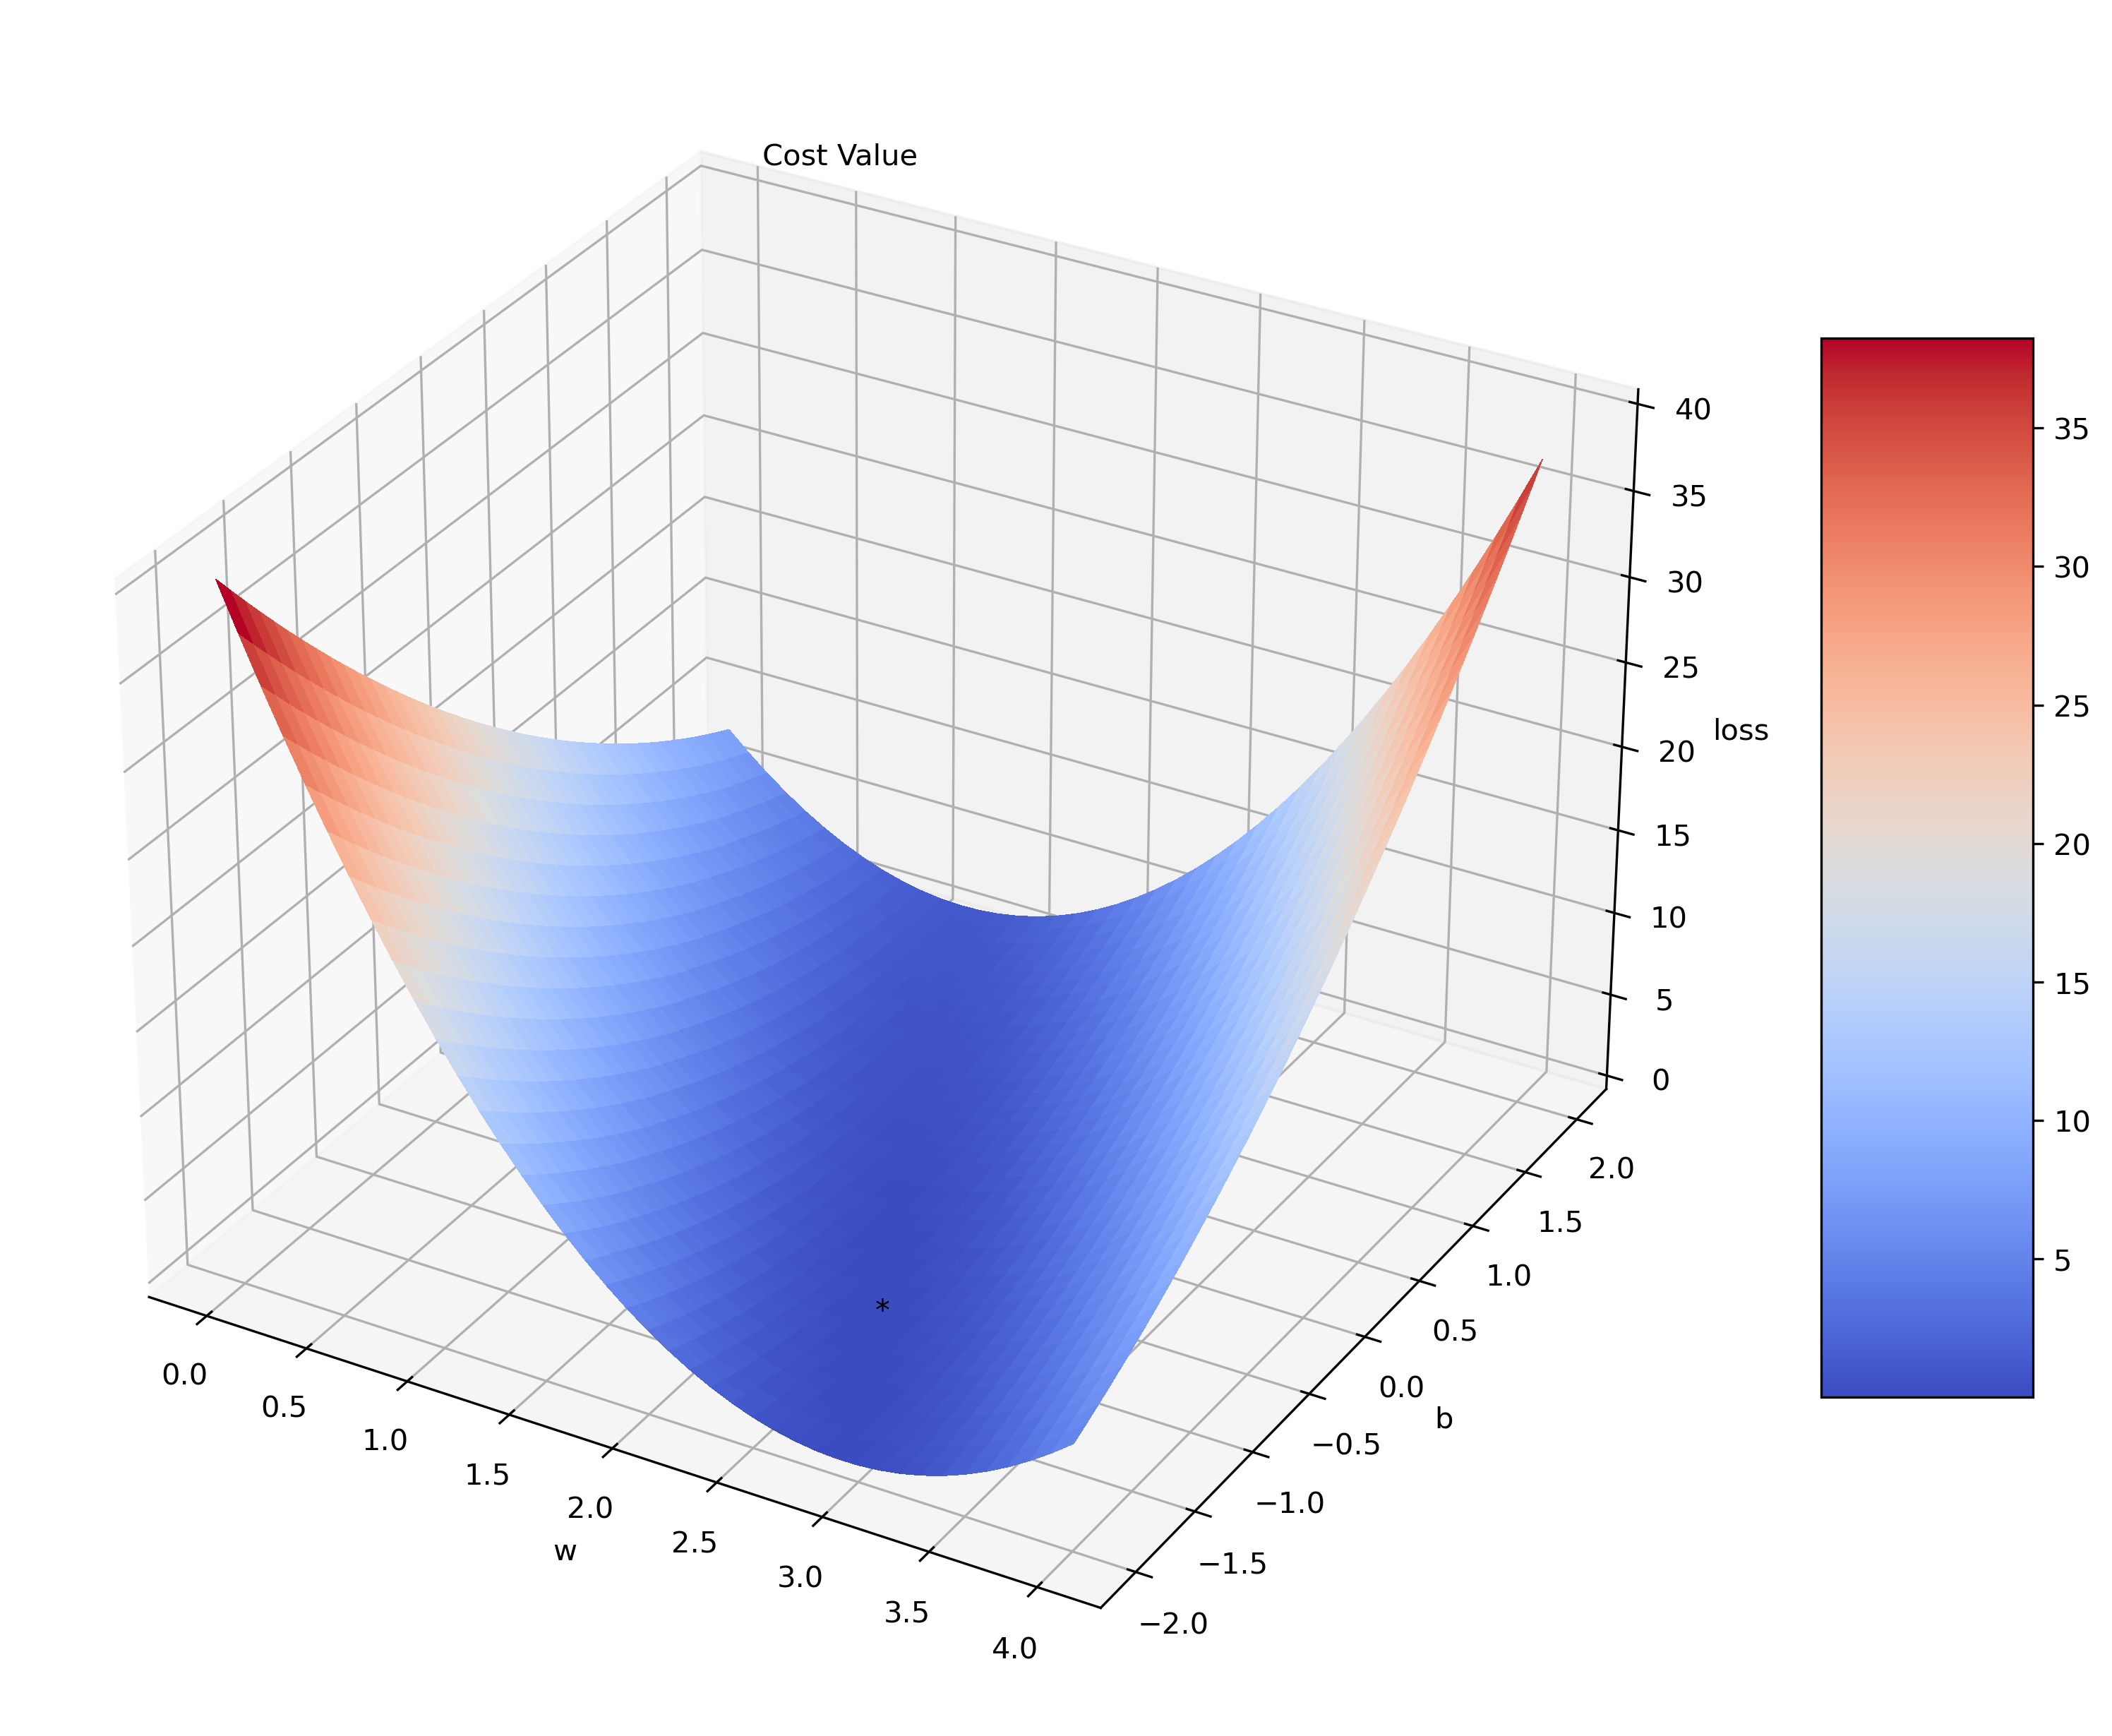

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# y = x*2.5-1 构造训练数据
x_data = [1.0, 2.0, 3.0]
y_data = [1.5, 4.0, 6.5]
W = np.arange(0.0, 4.1, 0.1, dtype=float)
B = np.arange(-2.0, 2.1, 0.1, dtype=float) # 规定 W,B 的区间
[w, b] = np.meshgrid(W, B, indexing='ij') # 构建矩阵坐标
# print('w:',np.around(W, 4))
# print('b:',np.around(B, 4))
print([w, b])

def forward(x):             #y= x*w+ b
    return x*w+b
    
def loss(y_pred, y):
    return (y_pred-y)*(y_pred-y)

# Make data.
mse_lst = []
l_sum = 0.
for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    loss_val = loss(y_pred_val, y_val)
    l_sum += loss_val
    print('-----############################-----------')
    print(x_val)
    print('----------------------------')
    print(y_val)
    print('----------------------------')
    print(y_pred_val)
    print('----------------------------')
    print(loss_val)
    print('----------------------------')
    
mse_lst.append(l_sum/3)

# 定义figure
fig = plt.figure(figsize=(10,10), dpi=300)
# 将figure变为3d
ax = Axes3D(fig)
# 绘图，rstride:行之间的跨度  cstride:列之间的跨度
x=w
y=b
z=np.array(mse_lst[0])
print('绘图')
print('X:',x)
print('Y:',y)
print('Z;',np.around(z, 4))
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 40)
# 设置坐标轴标签
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")
ax.text(0.2, 2, 43, "Cost Value", color='black')
ax.text(2.5,-1,0,'*', color='black')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [39]:
#为了可理解np.meshgrid

x_data = [1.0, 2.0, 3.0]
y_data = [1.5, 4.0, 6.5]
W = np.arange(0.0, 4.0, 1, dtype=float)
B = np.arange(-2.0, 2.0, 1, dtype=float) # 规定 W,B 的区间
[w, b] = np.meshgrid(W, B, indexing='ij') # 构建矩阵坐标
print('W:',np.around(W, 4))
print('B:',np.around(B, 4))
print([w, b])
print('-------')
print(w)
print('-------')
print(b)

W: [0. 1. 2. 3.]
B: [-2. -1.  0.  1.]
[array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.]]), array([[-2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.]])]
-------
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]
-------
[[-2. -1.  0.  1.]
 [-2. -1.  0.  1.]
 [-2. -1.  0.  1.]
 [-2. -1.  0.  1.]]
